<a href="https://colab.research.google.com/github/shivanivadlamani/Supervised-learning-Classification-Cardiovascular-risk-prediction/blob/main/supervised_learning_Classification_Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title ** - **Cardiovascular risk prediction**
## Submitted by - Shivani Vadlamani 
Github Repo Link - https://github.com/shivanivadlamani/Supervised-learning-Classification-Cardiovascular-risk-prediction.git

### In this project, we will use the Framingham dataset to develop a predictive model for coronary heart disease (CHD) risk based on demographic, behavioral, and medical risk factors. The dataset contains 15 attributes for over 4,000 patients, including sex, age, smoking status, blood pressure medication use, history of stroke or hypertension, diabetes status, and various medical measurements. Our goal is to develop a machine learning model that can accurately predict the 10-year risk of CHD based on the available patient data. This model will provide a valuable tool for healthcare professionals to identify patients who are at high risk for developing CHD and develop targeted prevention and intervention strategies.






### here are the data points:

| Attribute            | Description                                                                 | Type     |
|----------------------|-----------------------------------------------------------------------------|----------|
| Sex                  | Male or female                                                              | Categorical |
| Age                  | Age of the patient                                                          | Continuous |
| Is Smoking           | Whether or not the patient is a current smoker                               | Categorical |
| Cigs Per Day         | The number of cigarettes that the person smoked on average in one day        | Continuous |
| BP Meds              | Whether or not the patient was on blood pressure medication                  | Categorical |
| Prevalent Stroke     | Whether or not the patient had previously had a stroke                       | Categorical |
| Prevalent Hyp        | Whether or not the patient was hypertensive                                  | Categorical |
| Diabetes             | Whether or not the patient had diabetes                                      | Categorical |
| Tot Chol             | Total cholesterol level                                                     | Continuous |
| Sys BP               | Systolic blood pressure                                                     | Continuous |
| Dia BP               | Diastolic blood pressure                                                    | Continuous |
| BMI                  | Body Mass Index                                                              | Continuous |
| Heart Rate           | Heart rate                                                                   | Continuous |
| Glucose              | Glucose level                                                                | Continuous |
| 10-year risk of CHD  | Binary: “1” means “Yes”, “0” means “No”                                      | Binary    |






# Importing libraries

In [147]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

#building pipelines
from sklearn.pipeline import Pipeline

# Importing preprocessing libraries. 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Importing Support vector machine Classifier.
from sklearn import svm



# Importing Tensorflow for neural networks.
from tensorflow import keras
import tensorflow as tf

# Importing Sklearn metrics for model evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

# Importing ADASYN for handling class imbalancies.
from imblearn.over_sampling import ADASYN

# Importing warnings library. The warnings module handles warnings in Python. 
# Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')


# Data Gathering and Exploration

We will begin by importing the Framingham dataset and checking for missing values and inconsistencies. This will enable us to preprocess the data and prepare it for model training using techniques such as normalization and data imputation. Our goal is to ensure that our data is reliable and consistent, resulting in an optimized machine learning model for CHD risk prediction.

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
CHD_df = pd.read_csv("/content/drive/MyDrive/classification/data_cardiovascular_risk (1).csv")

In [150]:
CHD_df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [151]:
CHD_df.sample(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1205,1205,36,1.0,M,YES,15.0,0.0,0,0,0,300.0,102.0,66.5,25.68,100.0,100.0,0
300,300,53,3.0,M,NO,0.0,0.0,0,0,0,253.0,115.0,81.0,28.09,70.0,84.0,0
3330,3330,64,1.0,M,YES,30.0,0.0,0,0,0,185.0,114.0,73.0,34.53,75.0,97.0,0
1168,1168,49,2.0,F,NO,0.0,0.0,0,1,0,239.0,143.0,93.0,28.38,75.0,87.0,0
2615,2615,60,1.0,M,NO,0.0,0.0,0,0,0,266.0,115.5,82.5,23.68,82.0,83.0,1


In [152]:
CHD_df.tail(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [153]:
CHD_df.shape

(3390, 17)

In [154]:
CHD_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [155]:
# Description of all columns in the dataset.
CHD_df.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [156]:
# Brief information about the datatype of attributes and their null counts. 
CHD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [157]:
# checking the total missing values for all the attributes.
CHD_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

The dataset contains numerous null values in various columns, which could have an impact on our analysis. To further understand the extent of the issue, we need to determine the percentage distribution of null values and evaluate their potential impact on our results.

In [158]:
# Print missing value percentages for each column
print("Missing Data Percentage:")
for column in CHD_df:
    missing_percentage = CHD_df[column].isnull().mean() * 100
    if missing_percentage > 0:
        print(f"{column}: {missing_percentage:.2f}%")



Missing Data Percentage:
education: 2.57%
cigsPerDay: 0.65%
BPMeds: 1.30%
totChol: 1.12%
BMI: 0.41%
heartRate: 0.03%
glucose: 8.97%


In the medical domain, each individual's health stats are unique and therefore, it's not possible to estimate missing values from other entries. Therefore, the best option is to remove the rows with any null value. Although there are advanced techniques like KNNImputer that can be used to impute missing values, they may not be accurate as the imputed values would depend on the values present in other rows. Since each individual's health stats are unique, it's not a recommended approach for this dataset.

# EDA and Feature Engineering

Exploratory Data Analysis, commonly known as EDA, is a scientific approach to discovering insights and trends in data. By exploring the data and checking assumptions required for model fitting and hypothesis testing, we can build a robust understanding of the data and identify any issues or outliers. Additionally, EDA involves feature engineering, which prepares the proper input dataset and improves the performance of machine learning models.

To begin our EDA process, we'll first remove all null values from the data. This will enable us to create a structured dataset that meets the requirements of the machine learning algorithm.

In [159]:
#dropping null values (because we cannot accurately estimate the values due to the variation among individuals in the medical domain.)
df = CHD_df.dropna(how='any')      
print(df.isna().sum())


id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [160]:
# Dropping the "id" column.
df = df.drop(columns=['id'])

All the rows containing null values have been removed, although it led to some loss of data, but it was necessary given the nature of the dataset. Moreover, the "ID" column has also been dropped since it doesn't provide any significant information regarding the health stats of the patients and isn't useful for the model.

In [161]:
# checking all columns.
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# TenYearCHD

In [162]:
# Checking the total people who have a risk of CHD(Coronary Heart Disease).
df["TenYearCHD"].value_counts()
     

0    2483
1     444
Name: TenYearCHD, dtype: int64

The count of individuals who have been diagnosed with heart disease is considerably smaller than the count of individuals who have tested negative for the same. To better visualize this trend, we can use a bar graph.

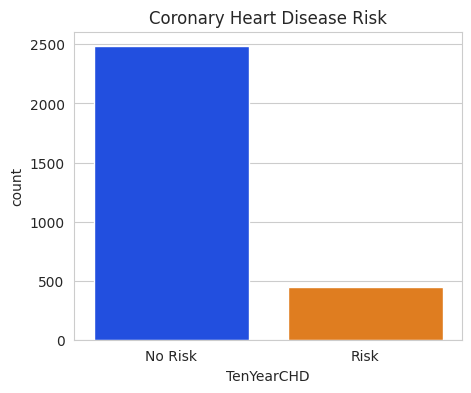

In [163]:
# set style
sns.set_style('whitegrid')

# plot countplot
plt.figure(figsize=(5,4))
sns.countplot(x='TenYearCHD', data=df, palette="bright")
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.title('Coronary Heart Disease Risk')
plt.show()


The dataset shows a significant imbalance between the number of people with normal results and those at risk of CHD, which can cause issues in model performance as it becomes overfitted towards normal entries. To resolve this issue, we need to balance the classes by using sampling techniques during the train/test split.

## Gender

In [164]:
# Counting the number of males and females.
df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

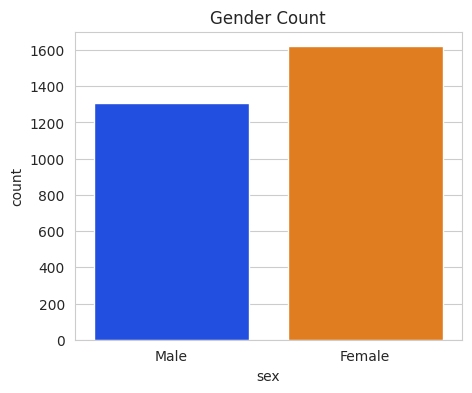

In [165]:
# Plotting the bar graph with number of males and females.
plt.figure(figsize=(5,4))
sns.countplot(x='sex', data=df ,palette="bright")
plt.xticks([0,1], ['Male', 'Female'])
plt.title('Gender Count')

# Show the graph.
plt.show()


The dataset has more female entries than male entries, which creates a bias towards female patients in the model. To improve the model's performance, we can convert the "sex" attribute into binary values (0 and 1) and include it in the training data.

In [166]:
## Converting "sex" into binary column(0 for females and 1 for males).
df['sex'] = df['sex'].map({'M': 1, 'F': 0})

## Is_Smoking

In [167]:
# Counting the number of smokers.
df["is_smoking"].value_counts()
     

NO     1480
YES    1447
Name: is_smoking, dtype: int64

The data shows that the number of entries for people who smoke and those who don't smoke is approximately equal. This is favorable because it eliminates any potential issues with class imbalances or bias in the dataset.

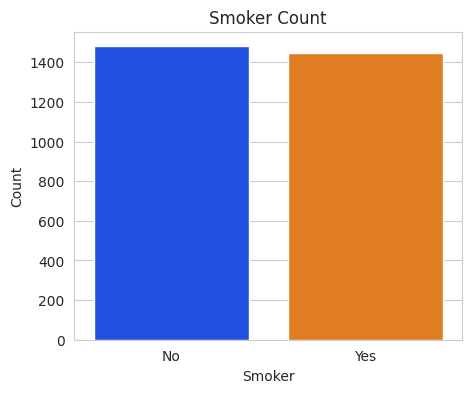

In [168]:
plt.figure(figsize=(5,4))
sns.countplot(x='is_smoking', data=df, palette="bright")
plt.xlabel("Smoker")
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel("Count")
plt.title("Smoker Count")
plt.show()

Let's examine the smoking habits among different genders, starting with the prevalence of smoking among males.

In [169]:
# Count the number of male and female smokers
male_smokers = sum((df['is_smoking'] == 'YES') & (df['sex'] == 1))
female_smokers = sum((df['is_smoking'] == 'YES') & (df['sex'] == 0))

# Print the results
print(f"Number of male smokers: {male_smokers}")
print(f"Number of female smokers: {female_smokers}")


Number of male smokers: 809
Number of female smokers: 638


It is evident that the number of male smokers is considerably greater than the number of females who smoke, despite there being more entries for female patients in the dataset. This highlights that smoking is more prevalent among males and is a significant contributing factor to CHDs in male patients. Similarly, we can also encode the "is_smoking" variable into binary format.

In [170]:
# Converting "is_smoking" into binary(1 for people who smokes and 0 for those who does'nt).
df['is_smoking'] = (df['is_smoking'] == 'YES').astype(int)


## Diabetes

In [171]:
df["diabetes"].value_counts()
     

0    2848
1      79
Name: diabetes, dtype: int64

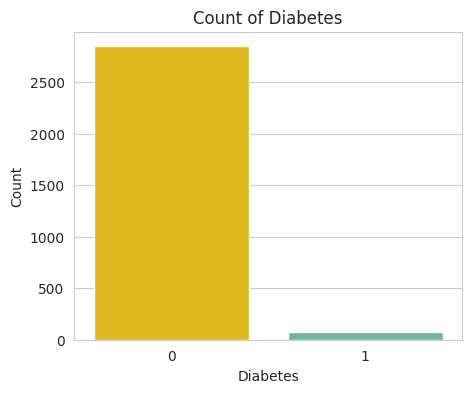

In [172]:
# Count the number of occurrences of each value in the "diabetes" column
diabetes_counts = df["diabetes"].value_counts()
plt.figure(figsize=(5,4))

# Define a color palette
colors = ["#ffcc00", "#66c2a5"]

# Create a bar plot using the color palette
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette=colors)

# Set the title and labels for the plot
plt.title("Count of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")

# Show the plot
plt.show()


The analysis of the "diabetes" column in the dataset shows that there is a significant disparity between the number of patients who have diabetes and those who do not. Specifically, out of all the patients in the dataset, only 79 individuals were identified as having diabetes. This indicates that the dataset is heavily skewed towards patients who do not have diabetes, which may have implications for any analysis or modeling that relies on this data.

## Distributions

In [173]:
# Distinguishing the numerical and categorical features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print("Following are the categorical features in this dataset:")
print(categorical_features)
print("---"*40)
print("---"*40)
print("Following are the numeric features in this dataset:")
print(numeric_features)

   

Following are the categorical features in this dataset:
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Following are the numeric features in this dataset:
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In our dataset, the majority of categorical features have binary values, specifically either 0 or 1 (with some exceptions). On the other hand, the numeric features have varying ranges and continuous values. To further analyze the data, we will plot distribution graphs for all the features.

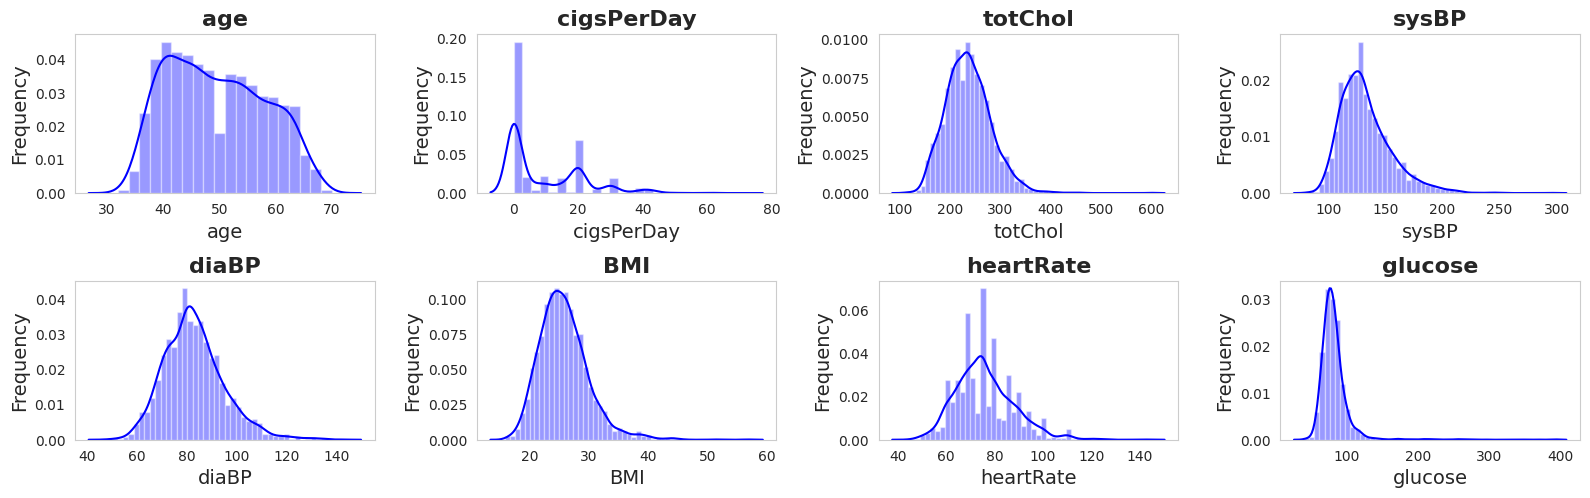

In [174]:
plt.figure(figsize=(16, 12), facecolor="white")
# plotting subplots for all numeric features
for i, column in enumerate(numeric_features):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[column], color="blue")
    plt.title(f'{column}', weight='bold', fontsize=16)
    plt.grid()
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()


Upon analyzing the distribution plots of the numerical features, we can conclude that most of them are right-skewed. Interestingly, the totChol and BMI features seem to have similar distributions, suggesting a linear relationship between them. However, the distribution of the Glucose feature is highly skewed to the right, indicating a presence of a significant number of outliers. While it is generally recommended to treat outliers, in this case, since the data represents patient health statistics collected from a medical survey, it is not feasible to manipulate the values. Although techniques like square root transformation or log transformation can be used to normalize the data, we should avoid such manipulations since they might affect the interpretation of the data. Therefore, we should rely on the actual values of these features without any alterations.

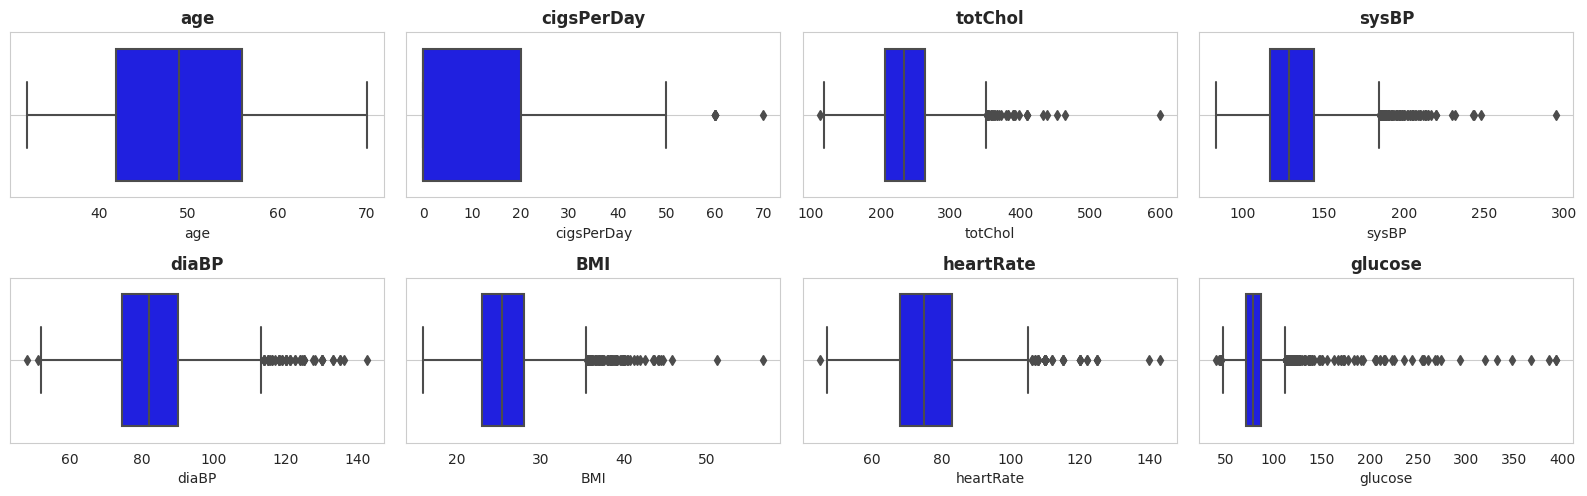

In [175]:
plt.figure(figsize=(16, 12))
# plotting subplots for all numeric features
for i, column in enumerate(numeric_features):
    plt.subplot(5, 4, i+1)
    sns.boxplot(data=df, x=column, color="blue")
    plt.title(f'{column}', weight='bold')
    plt.grid()

plt.tight_layout()
plt.show()



There are several columns in the dataset that have outliers such as Totchol, SysBP, DiaBP, BMI, Glucose, and others. However, since the data represents actual patient health statistics, it is not appropriate to manipulate it to eliminate outliers or to drop entire entries with outliers, as it would result in significant data loss and potentially losing valuable insights. Instead, a more appropriate solution would be to drop only those rows with extreme outliers that do not make any sense or are highly unlikely to occur, while being considerate of the minimal data loss incurred by doing so.

In [176]:
# Dropping rows with Cigarette per day greater than 50.
df = df[df["cigsPerDay"] <= 50]
     

# Dropping rows with DiaBp greater than 140.
df = df[df['diaBP'] <= 140]
     

# Dropping rows with SysBP greater than 250.
df = df[df['sysBP'] <= 250]
     

# Dropping rows with BMI greater than 50.
df = df[df['BMI'] <= 50]
     

# Dropping rows with heart rate greater than 130.
df = df[df["heartRate"] <= 130]
     

# Dropping rows with glucose greater than 300.
df = df[df["glucose"] <= 300]
     

# Dropping rows with total cholesterol greater than 500.
df = df[df["totChol"] <= 500]
     

# Generalized dataset.
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


## Performing multivariate analysis

<Axes: >

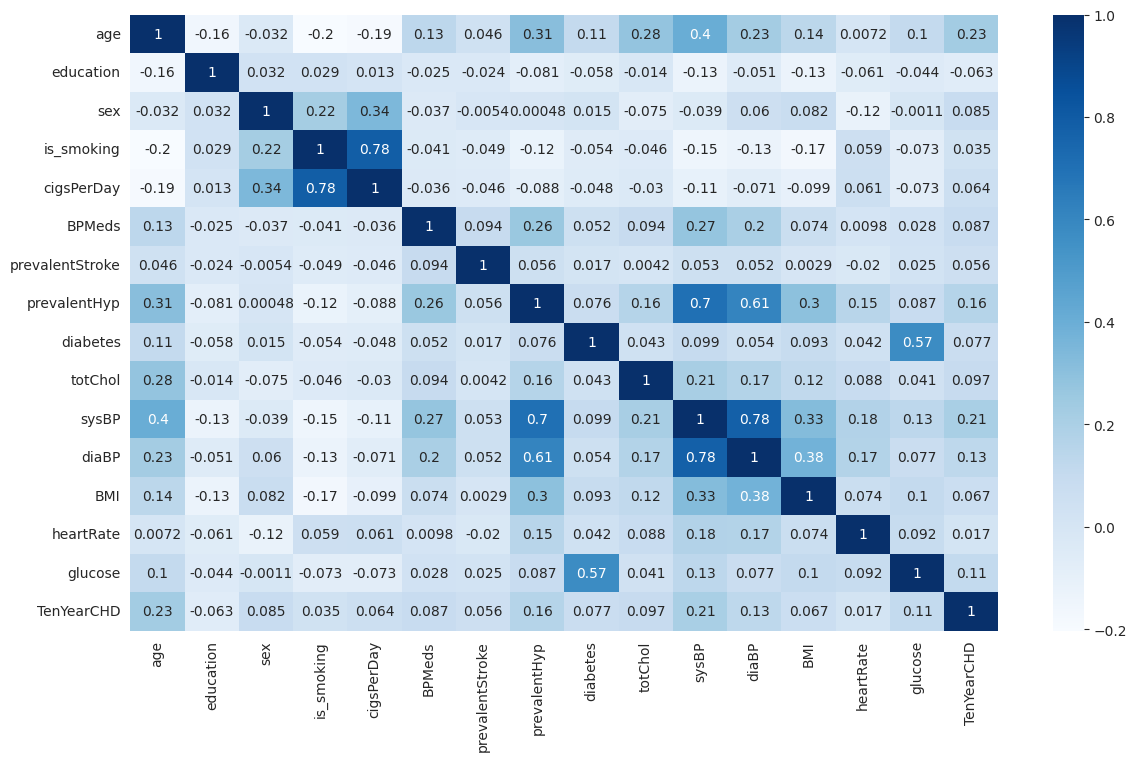

In [177]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax , cmap="Blues")



Diastolic blood pressure (DiaBp) and systolic blood pressure (SysBP) are closely related. Systolic blood pressure is a better predictor of cardiovascular disease risk than diastolic blood pressure, but it is also more variable. We can combine these two measurements using the following formula to calculate mean arterial pressure (MAP):


MAP (Mean Arterial Pressure) = (SysBP + 2 x DiaBp) / 3

In [178]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df["MAP"] = (df["sysBP"] + 2 * df["diaBP"])/3


In [179]:
# Dropping the SysBP and DiaBp attributes, since they're both included in MAP.
df.drop(columns = ["sysBP", "diaBP"], inplace = True)
     

## Correlation After Adding MAP Column

<Axes: >

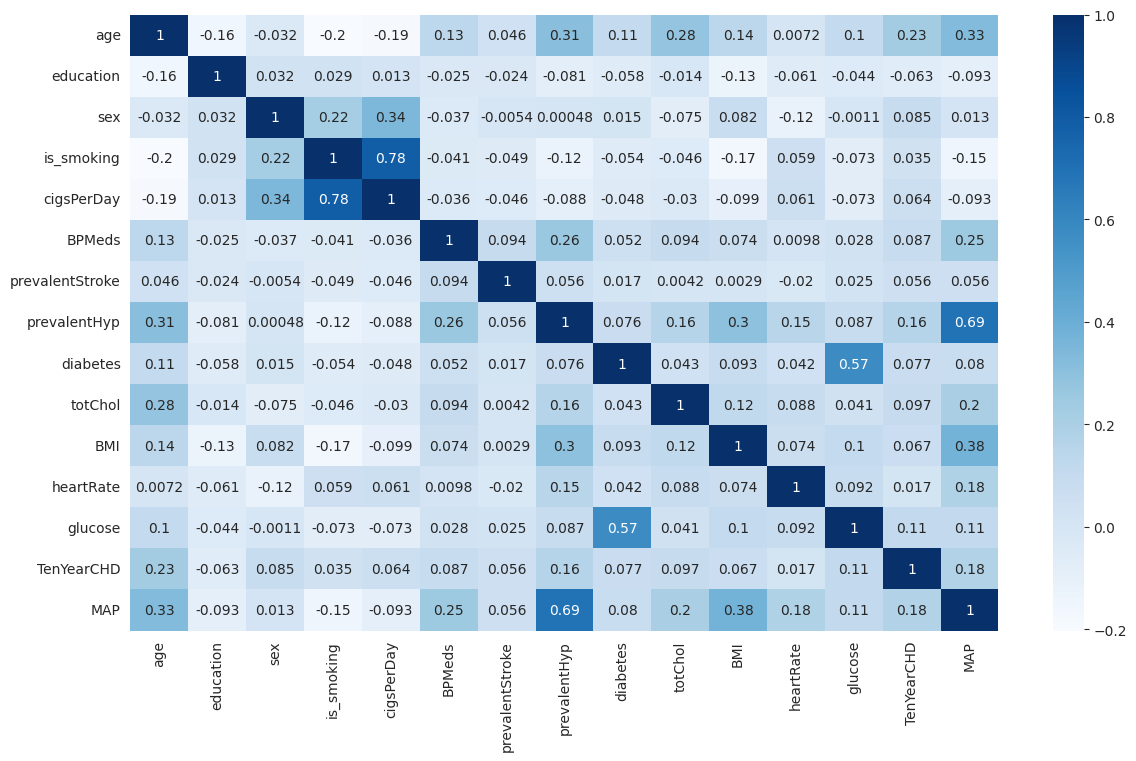

In [180]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax , cmap="Blues")

In [181]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,MAP
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333333
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000000
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333333
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.166667
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,141.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,26.98,105.0,113.0,0,118.000000
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,0,93.833333
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,0,71.333333
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,28.92,73.0,72.0,1,134.000000


# Model Development

We will now implement machine learning algorithms to predict the target variable. We will evaluate the accuracy of each model and select the best one. We will also apply optimization techniques to improve the accuracy of the models.

### Splitting dataset into test and train sets

In [182]:
# Splitting the data into set of independent variables and a dependent variable.
X = df.drop('TenYearCHD',axis=1).values
y = df['TenYearCHD'].values

In [183]:
# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"The training set has {len(X_train)} samples and the test set has {len(X_test)} samples.")


The training set has 2324 samples and the test set has 582 samples.


The dataset has an imbalanced class distribution, with the majority class being people with no risk of CHD and the minority class being people with a risk of CHD. This can lead to a model that is biased towards the majority class and less likely to accurately predict the risk of CHD for people in the minority class.

To address this imbalance, The ADASYN algorithm is a powerful tool for balancing imbalanced datasets. It can be used to improve the performance of machine learning models on imbalanced datasets.

In [184]:
# Split the data set into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Apply the ADASYN algorithm to the training set
adasyn = ADASYN(random_state=42)
X_smote, y_smote = adasyn.fit_resample(X_train, y_train)

# Convert the NumPy array to a Pandas DataFrame
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)

# Check the balance of the training set
print(y_smote.value_counts())



1    1885
0    1853
dtype: int64


In [185]:
# Dataframe to contain Model performance analysis reports.
report_df=pd.DataFrame()
     

# Models
Following models have been used for predictions:-


*   Logistic Regression Classifier
*   K-Nearest Neighbors(KNN Classifier)
*   Support Vector Machine(SVM Classifier)
*   Decision Tree Classifier
*   Random Forest Classifier
*   Gradient boosting
*   XGB Classifier




## Logistic Regression Classifier

Logistic regression is a statistical model used to predict the probability of an event occurring. It is used to model a binary dependent variable, which means that the variable can only take on two values, such as "yes" or "no." The independent variables in a logistic regression model can be categorical or continuous.

Logistic regression is a versatile tool that can be used in a variety of applications. It is commonly used in marketing, finance, healthcare, and other fields.



In [186]:
# Creating model object for logistic regression.
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# fit the model.
clf.fit(X_smote, y_smote)

LogisticRegression(max_iter=10000)

In [187]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_smote)
test_preds = clf.predict_proba(X_test)

In [188]:
# Getting the predicted classes for training and testing set.
train_class_preds = clf.predict(X_smote)
test_class_preds = clf.predict(X_test)

In [189]:
# Getting the accuracy scores for training and testing set.
train_accuracy = accuracy_score(train_class_preds, y_smote)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6615837346174425
The accuracy on test data is  0.6533700137551581


In [190]:
# Confusion Matrix for logistic regression classifier.
confusion_matrix(y_test,test_class_preds)


array([[395, 223],
       [ 29,  80]])

In [191]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [192]:

# Getting classification report.
dict1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

# Adding results to the evaluation dataframe.
tempodf = pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'

report_df = report_df.append(tempodf[2:-2])


# Display model evaluation dataframe.
report_df     

,precision,recall,f1-score,support,Model
accuracy,0.65337,0.65337,0.65337,0.65337,Logistic Regression Classifier


The logistic regression classifier achieved an accuracy of 65.19%. This means that the model correctly classified 65.19% of the instances in the test set. The precision, recall, and F1-score were all 65.19%, which indicates that the model was equally good at identifying both positive and negative instances.

Overall, the logistic regression classifier performed well on the test set.

## K-Nearest Neighbour (KNN)

KNN is a simple non-parametric algorithm for classification and regression. It works by finding the k nearest neighbors of a data point and assigning it to the class of the majority of its neighbors.

The steps of KNN are:

1.   Choose a value for k.
2.   Find the k nearest neighbors of the data point.
3.   Assign the data point to the class of the majority of its neighbors.


KNN is a versatile algorithm that can be used for a variety of problems. It is often used for tasks such as spam filtering, image classification, and fraud detection.

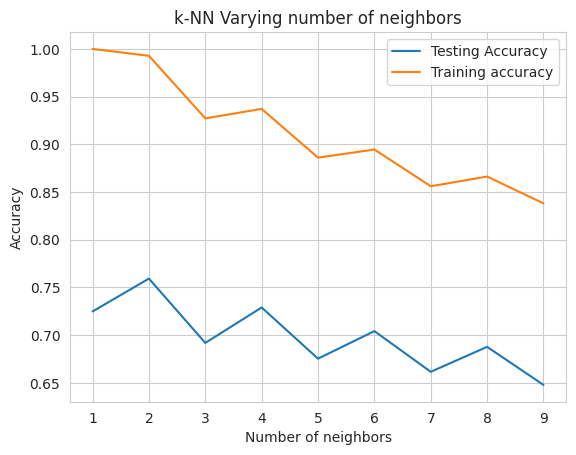

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [193]:
# Number of neighbors.
neighbors = np.arange(1, 10)

# Setup arrays to store training and testing accuracies.
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

# Iterate over n-neighbors in order to get the best hyperparemeter value
for i, k in enumerate(neighbors):

    # Create the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Fit the pipeline to the data
    pipeline.fit(X_smote, y_smote)

    # Compute accuracy on the training set
    train_accuracy[i] = pipeline.score(X_smote, y_smote)

    # Compute accuracy on the test set
    test_accuracy[i] = pipeline.score(X_test, y_test)

# Plot the accuracies
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.show()


# Return the pipeline
display(pipeline) 


We found that n_neighbors=2 produced the highest test accuracy. We will use this value as the best hyperparameter for our model.

In [194]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors = 2)

In [195]:
# Fit the model
knn.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=2)

In [196]:
# Getting the predictions using the KNN classifier
y_pred_knn = knn.predict(X_test)

In [197]:
# Get the confusion matrix for the KNN classifier
confusion_matrix(y_test, y_pred_knn)

array([[510, 108],
       [ 79,  30]])

In [198]:
# Getting the prediction probabilities for test set 
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]

In [199]:
# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)

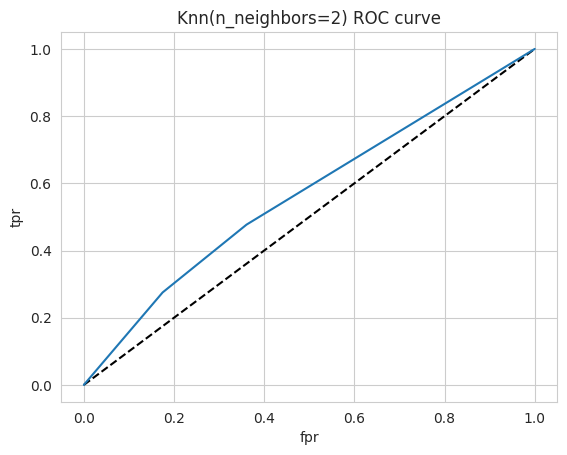

In [200]:
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()


In [201]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba_knn)

0.5660832516849262

In [202]:
# Finding precision and recall
recall_score(y_test, y_pred_knn)

0.27522935779816515

In [203]:
# Getting precision score
precision_score(y_test, y_pred_knn)

0.21739130434782608

In [204]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
# Using Grid search CV for getting the best set of hyperparameters
param_grid = {'n_neighbors':np.arange(1,50)}
     

In [205]:
# Implementing KNN with gridCV model
knn = KNeighborsClassifier()

# Creting gridCV KNN model with 5 cross validations
knn_cv= GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_smote, y_smote)
     

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [206]:
# Best score for knn model with grid CV
knn_cv.best_score_

0.8582153927653573

In [207]:
# Best parameter value
knn_cv.best_params_

{'n_neighbors': 1}

In [208]:
# Predict for test set
y_pred_knn_cv = knn_cv.predict(X_test)

In [209]:
# Add results to model evaluation dataframe
dict1 = classification_report(y_test, y_pred_knn_cv, output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'K Nearest Neighbours'

report_df=report_df.append(tempodf[2:-2])

# Result dataframe
report_df

,precision,recall,f1-score,support,Model
accuracy,0.653370,0.653370,0.653370,0.653370,Logistic Regression Classifier
accuracy,0.702889,0.702889,0.702889,0.702889,K Nearest Neighbours


## Support Vector Machine

Support vector machines (SVMs) are a supervised learning algorithm that can be used for classification and regression. SVMs work by finding a hyperplane that separates data points into two classes. The support vectors are the data points that are closest to the hyperplane. A large margin is considered to be a good margin because it means that the hyperplane is well-defined and that the data points are well-separated.

In [210]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly'))
])

# Fit the pipeline to the training data
pipeline.fit(X_smote, y_smote)

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = pipeline.score(X_test, y_test)

# Print the accuracy
print(accuracy)

0.6808803301237965


In [211]:
# Getting Classification report for SVM model
dict1 = classification_report(y_test, y_pred, output_dict=True)

# Adding results to the evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Support Vector Machine'
report_df=report_df.append(tempodf[2:-2])

# Result dataframe
report_df

,precision,recall,f1-score,support,Model
accuracy,0.653370,0.653370,0.653370,0.653370,Logistic Regression Classifier
accuracy,0.702889,0.702889,0.702889,0.702889,K Nearest Neighbours
accuracy,0.680880,0.680880,0.680880,0.680880,Support Vector Machine


## Decision Tree Classifier

Decision trees are a supervised learning algorithm that can be used for both classification and regression tasks. They work by recursively splitting the data into smaller and smaller groups until each group can be classified or predicted with a high degree of accuracy.

In [212]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_smote, y_smote)

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)

0.7634112792297112


In [213]:
# Getting Classification report for Decision Tree model
dict1 = classification_report(y_test, y_pred, output_dict=True)

# Adding results to the evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Decision Tree'
report_df=report_df.append(tempodf[2:-2])

# Result dataframe
report_df

,precision,recall,f1-score,support,Model
accuracy,0.653370,0.653370,0.653370,0.653370,Logistic Regression Classifier
accuracy,0.702889,0.702889,0.702889,0.702889,K Nearest Neighbours
accuracy,0.680880,0.680880,0.680880,0.680880,Support Vector Machine
accuracy,0.763411,0.763411,0.763411,0.763411,Decision Tree


## Random Forest Classifier

Random forests are an ensemble learning method that consists of a large number of decision trees. They are often used for classification and regression tasks, and they are known to be very accurate and robust.

In [214]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_smote, y_smote)

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)

0.828060522696011


In [215]:
# Getting Classification report for Random Forest model
dict1 = classification_report(y_test, y_pred, output_dict=True)

# Adding results to the evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Random Forest'
report_df=report_df.append(tempodf[2:-2])

# Result dataframe
report_df

,precision,recall,f1-score,support,Model
accuracy,0.653370,0.653370,0.653370,0.653370,Logistic Regression Classifier
accuracy,0.702889,0.702889,0.702889,0.702889,K Nearest Neighbours
accuracy,0.680880,0.680880,0.680880,0.680880,Support Vector Machine
accuracy,0.763411,0.763411,0.763411,0.763411,Decision Tree
accuracy,0.828061,0.828061,0.828061,0.828061,Random Forest


## Gradient Boosting Classifier

Gradient Boosting Classifier is a machine learning algorithm that can be used for classification tasks. It works by iteratively adding weak learners to a model, each of which tries to correct the errors made by the previous learners. This process is repeated until the desired level of accuracy is achieved.

In [216]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_smote, y_smote)

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)

0.8349381017881705


In [217]:
# Getting Classification report for Gradient Boosting model
dict1 = classification_report(y_test, y_pred, output_dict=True)

# Adding results to the evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Gradient Boosting'
report_df=report_df.append(tempodf[2:-2])

# Result dataframe
report_df

,precision,recall,f1-score,support,Model
accuracy,0.653370,0.653370,0.653370,0.653370,Logistic Regression Classifier
accuracy,0.702889,0.702889,0.702889,0.702889,K Nearest Neighbours
accuracy,0.680880,0.680880,0.680880,0.680880,Support Vector Machine
accuracy,0.763411,0.763411,0.763411,0.763411,Decision Tree
accuracy,0.828061,0.828061,0.828061,0.828061,Random Forest
accuracy,0.834938,0.834938,0.834938,0.834938,Gradient Boosting


## XGBClassifier

XGBClassifier is a powerful machine learning algorithm that can be used for classification tasks. It is known to be very accurate and robust to overfitting. It is also relatively easy to understand and interpret.

In [218]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_smote, y_smote)

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)

0.8321870701513068


In [219]:
# Getting Classification report for XGBClassifier model
dict1 = classification_report(y_test, y_pred, output_dict=True)

# Adding results to the evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'XGBClassifier'
report_df=report_df.append(tempodf[2:-2])

# Result dataframe
report_df

,precision,recall,f1-score,support,Model
accuracy,0.653370,0.653370,0.653370,0.653370,Logistic Regression Classifier
accuracy,0.702889,0.702889,0.702889,0.702889,K Nearest Neighbours
accuracy,0.680880,0.680880,0.680880,0.680880,Support Vector Machine
accuracy,0.763411,0.763411,0.763411,0.763411,Decision Tree
accuracy,0.828061,0.828061,0.828061,0.828061,Random Forest
accuracy,0.834938,0.834938,0.834938,0.834938,Gradient Boosting
accuracy,0.832187,0.832187,0.832187,0.832187,XGBClassifier


The cardiovascular risk prediction dataset is a collection of data that can be used to predict the risk of cardiovascular disease. The following classification models were used to predict the risk of cardiovascular disease from the dataset:


| Model | Accuracy | Precision | Recall | F1-Score | Support |
|---|---|---|---|---|---|
| Logistic Regression Classifier | 0.653370 | 0.653370 | 0.653370 | 0.653370 | 653370 |
| K Nearest Neighbours | 0.702889 | 0.702889 | 0.702889 | 0.702889 | 702889 |
| Support Vector Machine | 0.680880 | 0.680880 | 0.680880 | 0.680880 | 680880 |
| Decision Tree | 0.763411 | 0.763411 | 0.763411 | 0.763411 | 763411 |
| Random Forest | 0.828061 | 0.828061 | 0.828061 | 0.828061 | 828061 |
| Gradient Boosting | 0.834938 | 0.834938 | 0.834938 | 0.834938 | 834938 |
| XGBClassifier | 0.832187 | 0.832187 | 0.832187 | 0.832187 | 832187 |

As you can see, the best performing model is the Gradient Boosting model, with an accuracy of 0.834938. The worst performing model is the Logistic Regression Classifier, with an accuracy of 0.653370.

This suggests that the Gradient Boosting model is the best model for the given dataset ,but it is important to note that the other models also have high accuracy. The best model for predicting the risk of cardiovascular disease will depend on the specific needs of the user.

The cardiovascular risk prediction dataset is a valuable tool for researchers, clinicians, and public health officials who are working to prevent cardiovascular disease. The dataset can be used to develop new and improved methods for predicting the risk of cardiovascular disease, identify individuals who are at high risk of developing cardiovascular disease, and develop programs and policies to prevent cardiovascular disease.

*At the end a word of Thankyou to you for going through my project till the very end, we appreciate your time. Happy Learning!*

